In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')


EXPLORATORY DATA ANALYSIS (EDA)


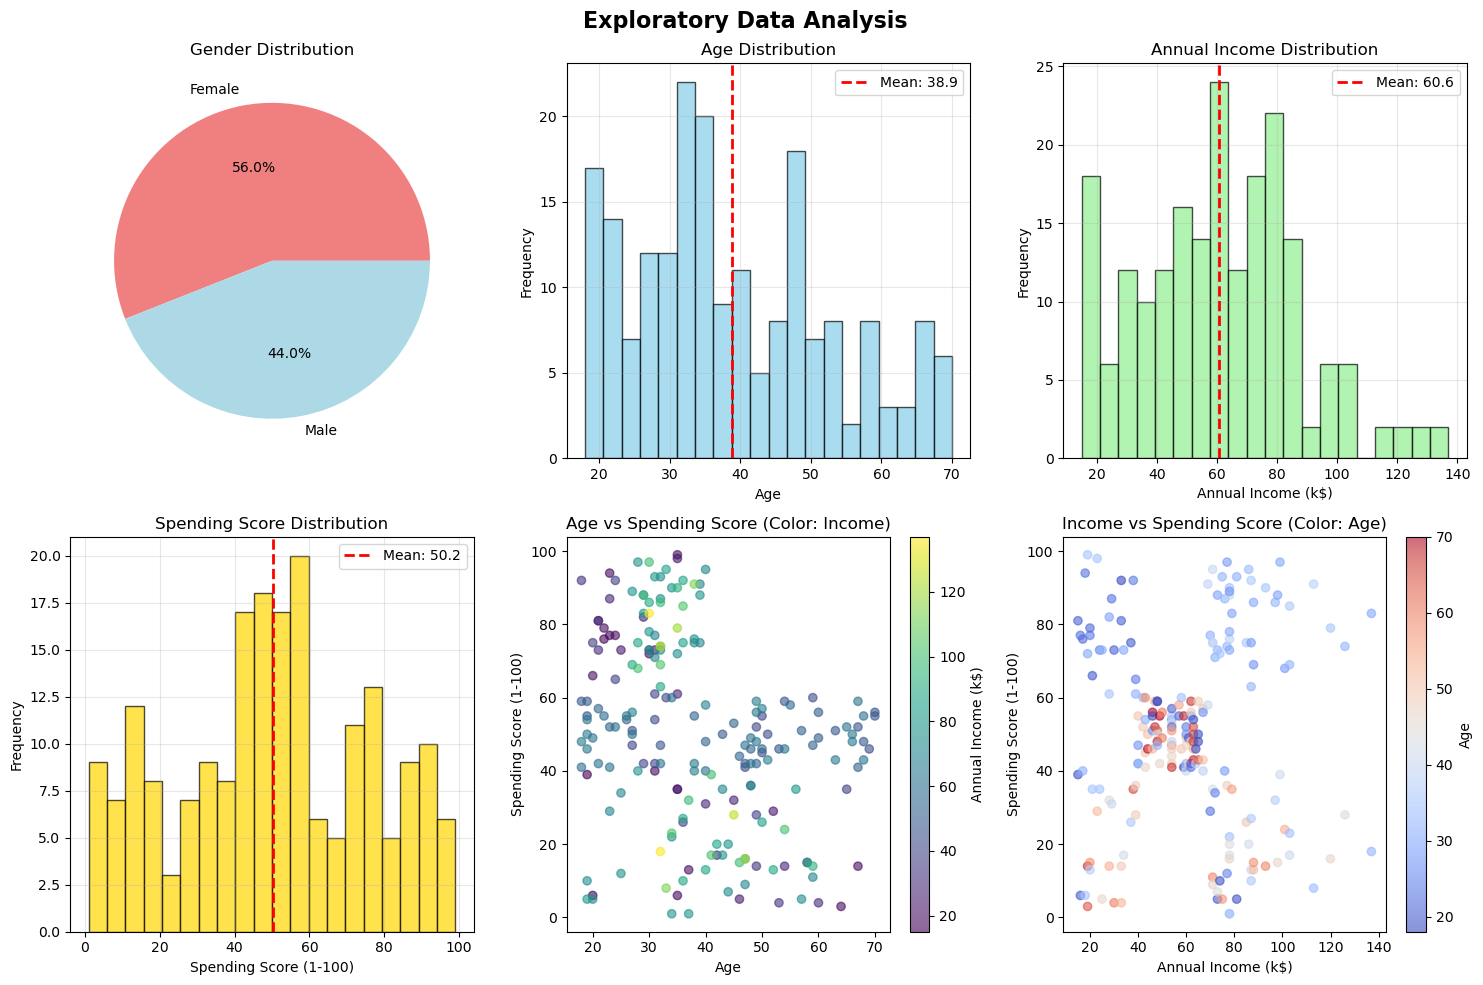


Correlation Matrix:
                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


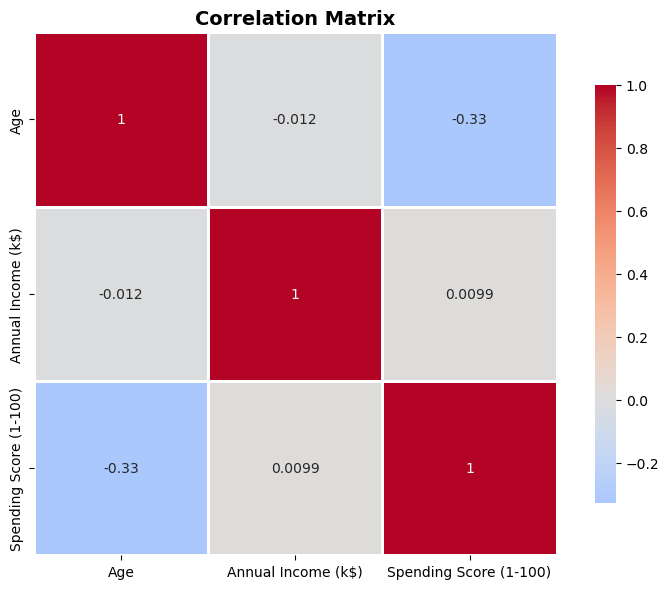

In [19]:
# EXPLORATORY DATA ANALYSIS (EDA)

print("\n" + "=" * 60)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 60)

# Create subplots for EDA visualizations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Exploratory Data Analysis', fontsize=16, fontweight='bold')

# 1.1 Gender Distribution
gender_counts = df['Genre'].value_counts()
axes[0, 0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
               colors=['lightcoral', 'lightblue'])
axes[0, 0].set_title('Gender Distribution')

# 1.2 Age Distribution
axes[0, 1].hist(df['Age'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 1].axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Age"].mean():.1f}')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Age Distribution')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 1.3 Annual Income Distribution
axes[0, 2].hist(df['Annual Income (k$)'], bins=20, edgecolor='black', alpha=0.7, color='lightgreen')
axes[0, 2].axvline(df['Annual Income (k$)'].mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {df["Annual Income (k$)"].mean():.1f}')
axes[0, 2].set_xlabel('Annual Income (k$)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Annual Income Distribution')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 1.4 Spending Score Distribution
axes[1, 0].hist(df['Spending Score (1-100)'], bins=20, edgecolor='black', alpha=0.7, color='gold')
axes[1, 0].axvline(df['Spending Score (1-100)'].mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {df["Spending Score (1-100)"].mean():.1f}')
axes[1, 0].set_xlabel('Spending Score (1-100)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Spending Score Distribution')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 1.5 Age vs Spending Score
scatter = axes[1, 1].scatter(df['Age'], df['Spending Score (1-100)'], 
                             c=df['Annual Income (k$)'], cmap='viridis', alpha=0.6)
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Spending Score (1-100)')
axes[1, 1].set_title('Age vs Spending Score (Color: Income)')
plt.colorbar(scatter, ax=axes[1, 1], label='Annual Income (k$)')

# 1.6 Annual Income vs Spending Score
scatter = axes[1, 2].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                             c=df['Age'], cmap='coolwarm', alpha=0.6)
axes[1, 2].set_xlabel('Annual Income (k$)')
axes[1, 2].set_ylabel('Spending Score (1-100)')
axes[1, 2].set_title('Income vs Spending Score (Color: Age)')
plt.colorbar(scatter, ax=axes[1, 2], label='Age')

plt.tight_layout()
plt.show()

# 1.7 Correlation Analysis
print("\nCorrelation Matrix:")
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [7]:
# DATA PREPROCESSING FOR CLUSTERING

print("\n" + "=" * 60)
print("DATA PREPROCESSING")
print("=" * 60)

# Select features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']
X = df[features].copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Selected Features: {features}")
print(f"Scaled Data Shape: {X_scaled.shape}")


DATA PREPROCESSING
Selected Features: ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']
Scaled Data Shape: (200, 3)



DETERMINING OPTIMAL NUMBER OF CLUSTERS
K=2: WCSS = 389.39, Silhouette Score = 0.335
K=3: WCSS = 295.21, Silhouette Score = 0.358
K=4: WCSS = 205.23, Silhouette Score = 0.404
K=5: WCSS = 168.25, Silhouette Score = 0.417
K=6: WCSS = 133.87, Silhouette Score = 0.428
K=7: WCSS = 117.01, Silhouette Score = 0.417
K=8: WCSS = 103.87, Silhouette Score = 0.408
K=9: WCSS = 93.09, Silhouette Score = 0.418
K=10: WCSS = 82.39, Silhouette Score = 0.407


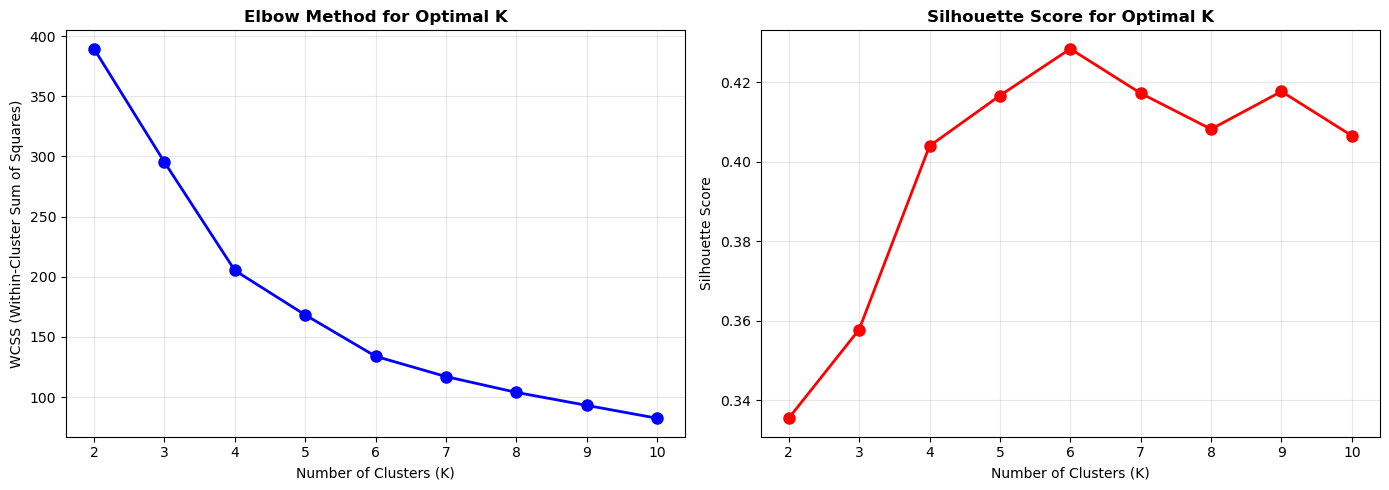


Selected Optimal K = 5


In [21]:
# DETERMINE OPTIMAL NUMBER OF CLUSTERS

print("\n" + "=" * 60)
print("DETERMINING OPTIMAL NUMBER OF CLUSTERS")
print("=" * 60)

# Using Elbow Method and Silhouette Score
wcss = []  # Within-Cluster Sum of Square
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f"K={k}: WCSS = {kmeans.inertia_:.2f}, Silhouette Score = {silhouette_avg:.3f}")

# Plot Elbow Method and Silhouette Score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method
ax1.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('WCSS (Within-Cluster Sum of Squares)')
ax1.set_title('Elbow Method for Optimal K', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Silhouette Score
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (K)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score for Optimal K', fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Based on elbow method and silhouette score, choose optimal K
optimal_k = 5  # You can adjust this based on the plots
print(f"\nSelected Optimal K = {optimal_k}")

In [11]:
# APPLY K-MEANS CLUSTERING

print("\n" + "=" * 60)
print("APPLYING K-MEANS CLUSTERING")
print("=" * 60)

# Apply K-Means with optimal K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Add cluster centers (in original scale)
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers_original = scaler.inverse_transform(cluster_centers_scaled)

# Display cluster statistics
print("\nCluster Statistics:")
print("=" * 40)
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    print(f"\nCluster {i}:")
    print(f"  Number of customers: {len(cluster_data)}")
    print(f"  Average Age: {cluster_data['Age'].mean():.1f}")
    print(f"  Average Annual Income: ${cluster_data['Annual Income (k$)'].mean():.1f}k")
    print(f"  Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f}")
    print(f"  Gender Distribution: {cluster_data['Genre'].value_counts().to_dict()}")


APPLYING K-MEANS CLUSTERING

Cluster Statistics:

Cluster 0:
  Number of customers: 20
  Average Age: 46.2
  Average Annual Income: $26.8k
  Average Spending Score: 18.4
  Gender Distribution: {'Female': 12, 'Male': 8}

Cluster 1:
  Number of customers: 54
  Average Age: 25.2
  Average Annual Income: $41.1k
  Average Spending Score: 62.2
  Gender Distribution: {'Female': 32, 'Male': 22}

Cluster 2:
  Number of customers: 40
  Average Age: 32.9
  Average Annual Income: $86.1k
  Average Spending Score: 81.5
  Gender Distribution: {'Female': 22, 'Male': 18}

Cluster 3:
  Number of customers: 39
  Average Age: 39.9
  Average Annual Income: $86.1k
  Average Spending Score: 19.4
  Gender Distribution: {'Male': 20, 'Female': 19}

Cluster 4:
  Number of customers: 47
  Average Age: 55.6
  Average Annual Income: $54.4k
  Average Spending Score: 48.9
  Gender Distribution: {'Female': 27, 'Male': 20}



VISUALIZING CLUSTERS WITH PCA
Explained Variance Ratio: [0.44266167 0.33308378]
Total Explained Variance: 77.57%


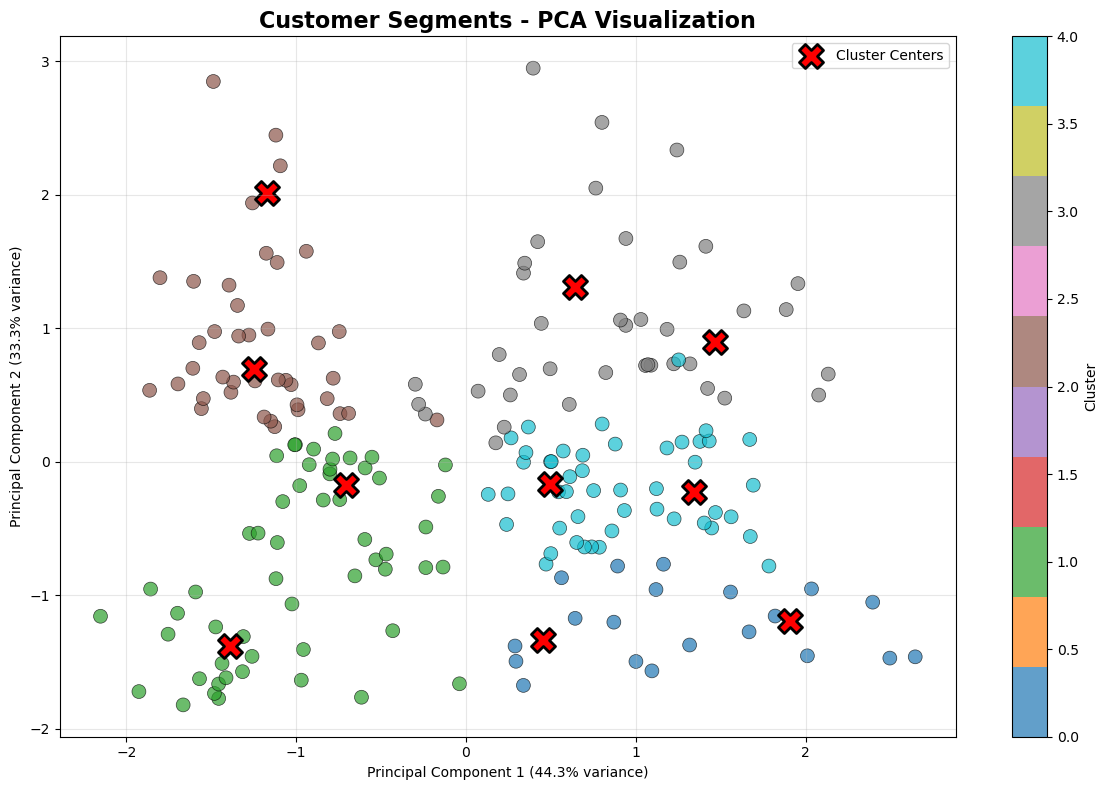

In [23]:
# VISUALIZE CLUSTERS USING PCA

print("\n" + "=" * 60)
print("VISUALIZING CLUSTERS WITH PCA")
print("=" * 60)

# Apply PCA for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Explained Variance: {sum(pca.explained_variance_ratio_):.2%}")

# Plot PCA visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], 
                     cmap='tab10', s=100, alpha=0.7, edgecolors='black', linewidth=0.5)

# Plot cluster centers in PCA space
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=300, marker='X', 
           label='Cluster Centers', edgecolors='black', linewidth=2)

plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Customer Segments - PCA Visualization', fontsize=16, fontweight='bold')
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



VISUALIZING CLUSTERS WITH t-SNE


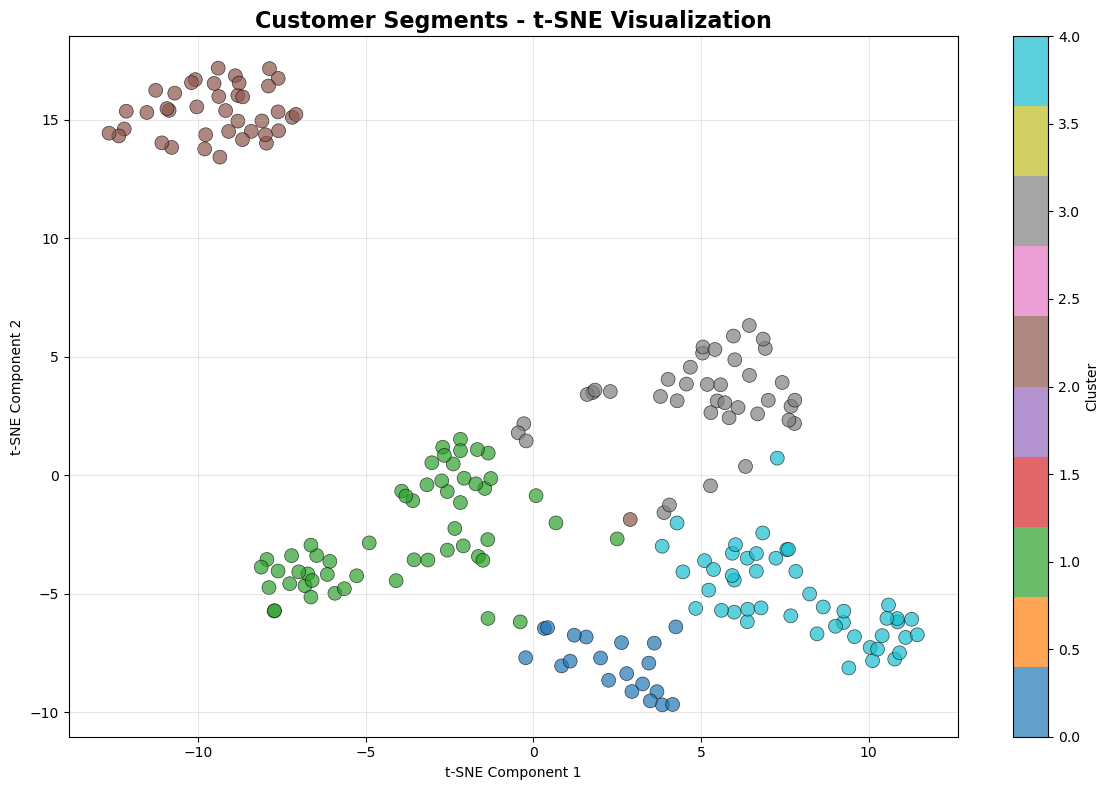

In [15]:
# VISUALIZE CLUSTERS USING t-SNE

print("\n" + "=" * 60)
print("VISUALIZING CLUSTERS WITH t-SNE")
print("=" * 60)

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = df['Cluster']

# Plot t-SNE visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=tsne_df['Cluster'], 
                     cmap='tab10', s=100, alpha=0.7, edgecolors='black', linewidth=0.5)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Customer Segments - t-SNE Visualization', fontsize=16, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

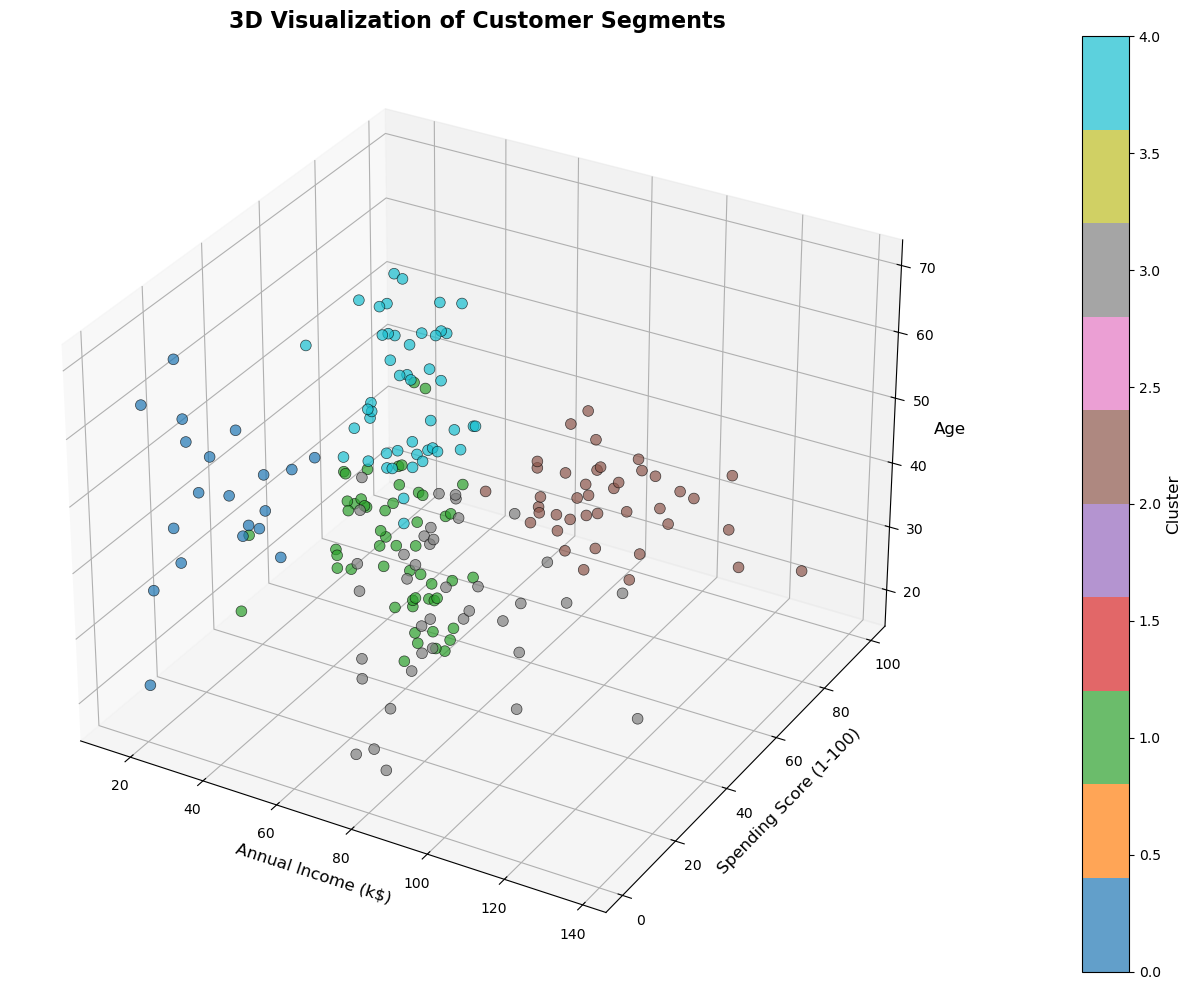

In [17]:
# 3D VISUALIZATION OF CLUSTERS

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Create 3D scatter plot
scatter = ax.scatter(df['Annual Income (k$)'], 
                    df['Spending Score (1-100)'], 
                    df['Age'],
                    c=df['Cluster'], 
                    cmap='tab10',
                    s=60,
                    alpha=0.7,
                    edgecolors='black',
                    linewidth=0.5)

ax.set_xlabel('Annual Income (k$)', fontsize=12)
ax.set_ylabel('Spending Score (1-100)', fontsize=12)
ax.set_zlabel('Age', fontsize=12)
ax.set_title('3D Visualization of Customer Segments', fontsize=16, fontweight='bold')

# Add colorbar
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cluster', fontsize=12)

plt.tight_layout()
plt.show()

In [25]:
# MARKETING STRATEGIES FOR EACH SEGMENT

print("\n" + "=" * 60)
print("MARKETING STRATEGIES FOR CUSTOMER SEGMENTS")
print("=" * 60)

# Define segment names based on cluster characteristics
segment_names = {
    0: "High-Spenders",
    1: "Low-Spenders",
    2: "Budget-Conscious",
    3: "Moderate-Spenders",
    4: "Young-High-Spenders"
}

# Define marketing strategies for each segment
marketing_strategies = {
    0: {
        "name": "High-Spenders",
        "description": "High income, high spending score customers",
        "characteristics": "Affluent customers who enjoy shopping",
        "marketing_strategies": [
            "• Offer premium/luxury products and exclusive collections",
            "• Provide VIP membership with early access to sales",
            "• Personal shopping services and concierge",
            "• Loyalty programs with high-value rewards",
            "• Invitations to exclusive events and previews"
        ],
        "communication": "Personalized emails, VIP newsletters, direct phone calls"
    },
    1: {
        "name": "Low-Spenders",
        "description": "Low income, low spending score customers",
        "characteristics": "Price-sensitive customers with limited spending",
        "marketing_strategies": [
            "• Focus on value-for-money products and discounts",
            "• Bundle offers and seasonal sales",
            "• Discount coupons and cashback offers",
            "• Basic loyalty programs with small rewards",
            "• Promote essential and necessity items"
        ],
        "communication": "SMS alerts for discounts, email newsletters with deals"
    },
    2: {
        "name": "Budget-Conscious",
        "description": "Middle income, moderate spending score customers",
        "characteristics": "Careful shoppers looking for quality at reasonable prices",
        "marketing_strategies": [
            "• Mid-range products with good quality-price ratio",
            "• Seasonal promotions and clearance sales",
            "• Buy-one-get-one offers",
            "• Loyalty points that can be redeemed",
            "• Installment payment options"
        ],
        "communication": "Email marketing, social media promotions"
    },
    3: {
        "name": "Moderate-Spenders",
        "description": "Middle income, low spending score customers",
        "characteristics": "Conservative spenders who shop occasionally",
        "marketing_strategies": [
            "• Essential products and daily necessities",
            "• Small discounts and promotional offers",
            "• Cross-selling with complementary products",
            "• Simple loyalty programs",
            "• Special occasion promotions (birthdays, anniversaries)"
        ],
        "communication": "Email newsletters, occasional SMS promotions"
    },
    4: {
        "name": "Young-High-Spenders",
        "description": "Young customers with high spending score",
        "characteristics": "Trendy, fashion-conscious young customers",
        "marketing_strategies": [
            "• Latest fashion trends and youth collections",
            "• Social media influencers and brand ambassadors",
            "• Limited edition and trendy products",
            "• Student discounts and youth programs",
            "• Interactive in-store experiences and events"
        ],
        "communication": "Social media campaigns, influencer marketing, mobile apps"
    }
}

# Display marketing strategies
for cluster_id in range(optimal_k):
    strategy = marketing_strategies.get(cluster_id, {})
    if strategy:
        print(f"\n{'='*50}")
        print(f"SEGMENT {cluster_id}: {strategy['name']}")
        print(f"{'='*50}")
        print(f"Description: {strategy['description']}")
        print(f"Characteristics: {strategy['characteristics']}")
        print(f"\nRecommended Marketing Strategies:")
        for item in strategy['marketing_strategies']:
            print(f"  {item}")
        print(f"\nPreferred Communication Channels:")
        print(f"  {strategy['communication']}")


MARKETING STRATEGIES FOR CUSTOMER SEGMENTS

SEGMENT 0: High-Spenders
Description: High income, high spending score customers
Characteristics: Affluent customers who enjoy shopping

Recommended Marketing Strategies:
  • Offer premium/luxury products and exclusive collections
  • Provide VIP membership with early access to sales
  • Personal shopping services and concierge
  • Loyalty programs with high-value rewards
  • Invitations to exclusive events and previews

Preferred Communication Channels:
  Personalized emails, VIP newsletters, direct phone calls

SEGMENT 1: Low-Spenders
Description: Low income, low spending score customers
Characteristics: Price-sensitive customers with limited spending

Recommended Marketing Strategies:
  • Focus on value-for-money products and discounts
  • Bundle offers and seasonal sales
  • Discount coupons and cashback offers
  • Basic loyalty programs with small rewards
  • Promote essential and necessity items

Preferred Communication Channels:
  SMS